In [3]:
import os
import pandas as pd

In [4]:
results = pd.read_json(os.path.join('data','ergast-results.json'))
wikidata_ids = pd.read_csv(os.path.join('data','wikidata_ids.csv'))
wikid = pd.read_json(os.path.join('data','wikidata.json'))

In [5]:
results = results.merge(wikidata_ids, left_on="driverUrl", right_on="url")

In [6]:
wikid

,wikidata_id,full_name,bio,gender,date_of_birth,place_of_birth,date_of_death,place_of_death,cause_of_death,manner_of_death
0,Q10349696,Pietro Fittipaldi,Brazilian-American racing driver,male,1996-06-25T00:00:00.000,Miami,None,None,None,None
1,Q10490,Ayrton Senna,Brazilian racing driver (1960-1994),male,1960-03-21T00:00:00.000,maternity hospital of São Paulo,1994-05-01T00:00:00.000,Ospedale Maggiore di Bologna,traumatic brain injury,accidental death
2,Q10494,Alain Prost,French racing driver,male,1955-02-24T00:00:00.000,Lorette,None,None,None,None
3,Q10501,Nigel Mansell,British racing driver (born 1953),male,1953-08-08T00:00:00.000,Upton-upon-Severn,None,None,None,None
4,Q10505,Damon Hill,British racing driver,male,1960-09-17T00:00:00.000,Hampstead,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
853,Q9673,Lewis Hamilton,British racing driver,male,1985-01-07T00:00:00.000,Stevenage,None,None,None,None
854,Q975207,Marcus Ericsson,Swedish racing driver,male,1990-09-02T00:00:00.000,Kumla,None,None,None,None
855,Q977386,Roberto Merhi,Spanish racing driver,male,1991-03-22T00:00:00.000,Benicàssim,None,None,None,None
856,Q979668,Daniil Kvyat,Russian racing car driver,male,1994-04-26T00:00:00.000,Ufa,None,None,None,None


In [7]:
results = results.merge(wikid, left_on="wikidata_id", right_on="wikidata_id")

In [8]:
results['date_of_death'] = pd.to_datetime(results['date_of_death'])

In [9]:
results['date'] = pd.to_datetime(results['date'])

In [10]:
results.groupby('date_of_death')['name'].nunique().nlargest(10)

date_of_death
1951-07-29    3
1960-06-19    3
1957-07-14    2
1959-08-01    2
1966-06-11    2
1975-11-29    2
1987-02-10    2
2014-05-04    2
1950-07-29    1
1950-09-10    1
Name: name, dtype: int64

In [11]:
results[results['name'] == 'Ayrton Senna']['date']

3411   1993-03-14
3412   1993-03-28
3413   1993-04-11
3414   1993-05-09
3415   1993-05-23
          ...    
3568   1984-04-07
3569   1984-08-19
3570   1984-05-06
3571   1984-03-25
3572   1984-05-20
Name: date, Length: 162, dtype: datetime64[ns]

In [12]:
results['life_remaining'] = results['date_of_death'] - results['date']

In [13]:
results.groupby('year')['life_remaining'].mean().nsmallest()

year
2014.0              389 days 12:48:00
2013.0    719 days 08:50:31.578947368
1994.0             3658 days 08:00:00
1993.0   3675 days 18:15:39.130434752
1992.0             4000 days 22:00:00
Name: life_remaining, dtype: timedelta64[ns]

In [14]:
results[(results['life_remaining'] < pd.Timedelta((365*5), unit='d')) & (~results['gp'].str.contains('Indiana'))].groupby('raceId')['name'].nunique().nlargest(10)

raceId
680.0    9
684.0    9
766.0    9
803.0    9
669.0    8
678.0    8
681.0    8
682.0    8
685.0    8
771.0    8
Name: name, dtype: int64

In [15]:
results[results['raceId'] == 680][['year','gp','date']].drop_duplicates()

,year,gp,date
5529,1967.0,Monaco Grand Prix,1967-05-07


<Axes: xlabel='year'>

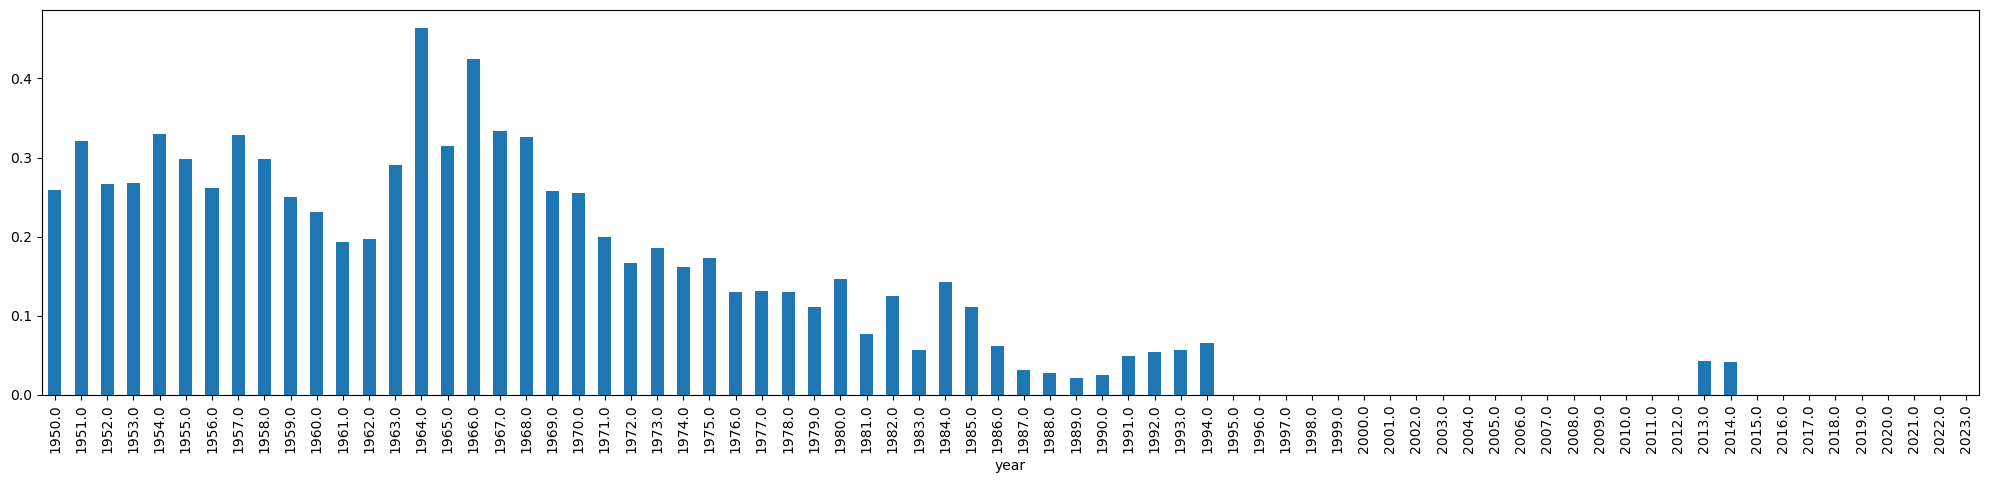

In [16]:
pd.Series(results[(results['life_remaining'] < pd.Timedelta((365.25*10), unit='d'))].groupby('year')['name'].nunique() / results.groupby('year')['name'].nunique()).plot.bar(figsize=(25,5))

<Axes: xlabel='year'>

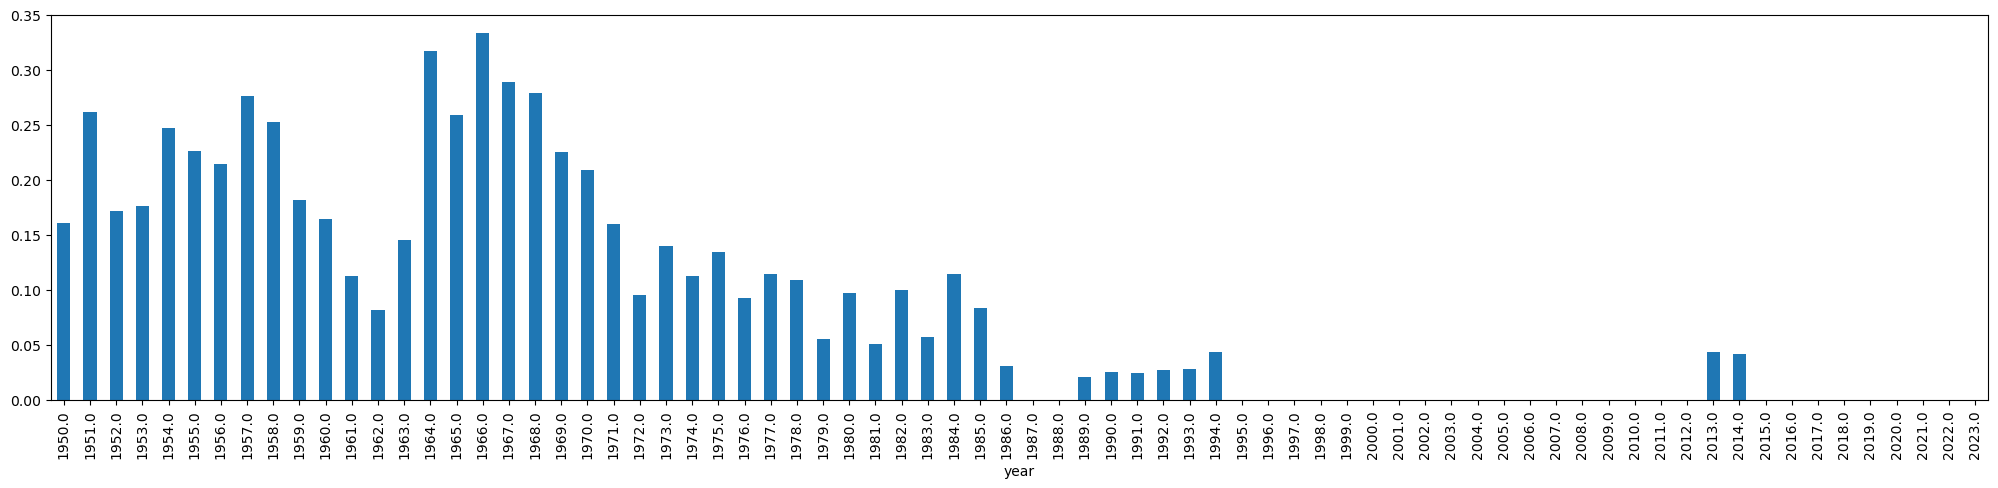

In [17]:
pd.Series(results[(results['life_remaining'] < pd.Timedelta((365.25*5), unit='d'))].groupby('year')['name'].nunique() / results.groupby('year')['name'].nunique()).plot.bar(figsize=(25,5))

<Axes: xlabel='year'>

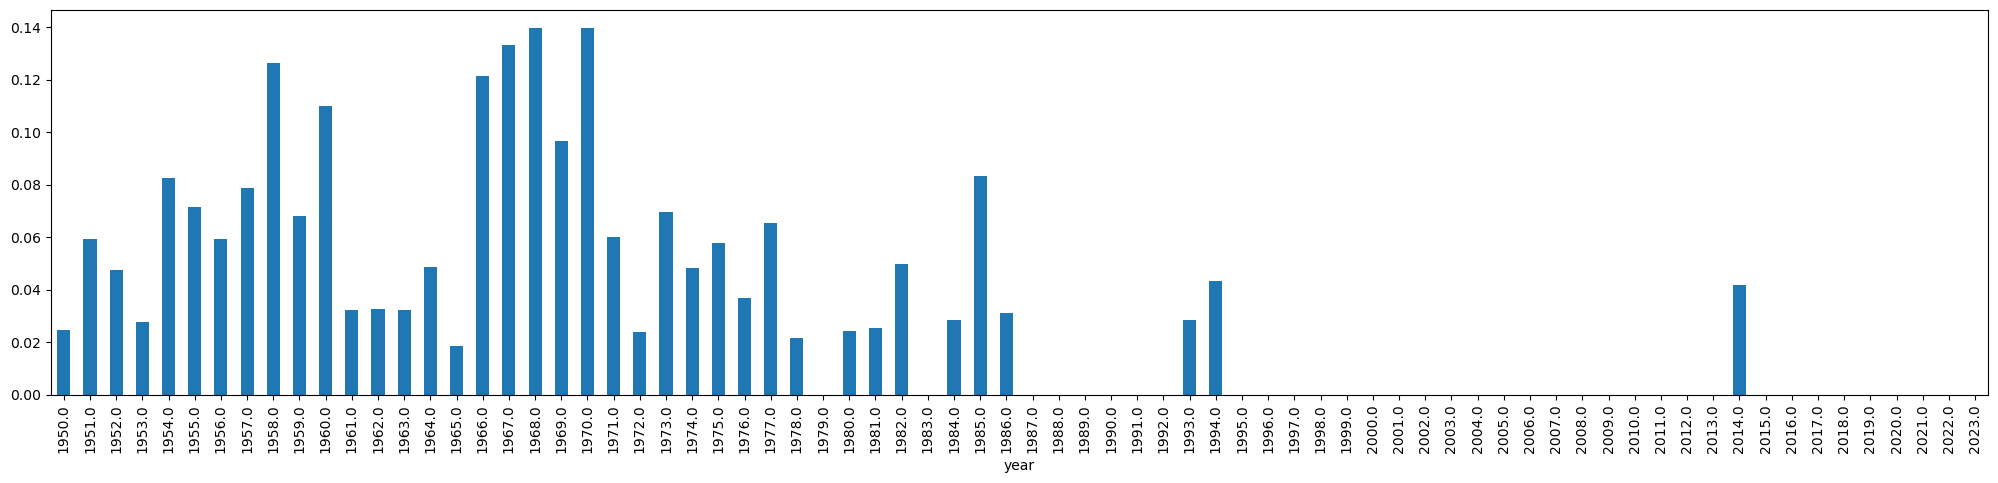

In [18]:
pd.Series(results[(results['life_remaining'] < pd.Timedelta((365.25), unit='d'))].groupby('year')['name'].nunique() / results.groupby('year')['name'].nunique()).plot.bar(figsize=(25,5))

In [19]:
results['manner_of_death'].drop_duplicates()

0                           None
3411            accidental death
4216              natural causes
14990                    suicide
22878    Graham Hill plane crash
23591                   homicide
24793    1967 British Grand Prix
25046           Formula One race
Name: manner_of_death, dtype: object

In [20]:
sad = ['accidental death','Graham Hill plane crash','1967 British Grand Prix','Formula One race']

In [21]:
results[results['manner_of_death'] == 'homicide'][['name','date_of_death']].drop_duplicates()

,name,date_of_death
23591,Jackie Pretorius,2009-03-30
24252,Ricardo Londoño,2009-07-18


In [22]:
results[results['manner_of_death'] == 'suicide'][['name','date_of_death']].drop_duplicates()

,name,date_of_death
14990,Willy Mairesse,1969-09-02
25125,Hap Sharp,1993-05-07


In [23]:
def total_age(dod, dob):
    try:
        print(dod)
        print(dob)
        return dod - dob
    except:
        return None

In [24]:
results.groupby(['date_of_death'])['name'].nunique().nlargest()

date_of_death
1951-07-29    3
1960-06-19    3
1957-07-14    2
1959-08-01    2
1966-06-11    2
Name: name, dtype: int64

In [25]:
results['lived_until'] = results.apply(lambda row: total_age(row['date_of_death'], row['date_of_birth']), axis = 1)

NaT
1985-01-07T00:00:00.000
NaT
1985-01-07T00:00:00.000
NaT
1985-01-07T00:00:00.000
NaT
1985-01-07T00:00:00.000
NaT
1985-01-07T00:00:00.000
NaT
1985-01-07T00:00:00.000
NaT
1985-01-07T00:00:00.000
NaT
1985-01-07T00:00:00.000
NaT
1985-01-07T00:00:00.000
NaT
1985-01-07T00:00:00.000
NaT
1985-01-07T00:00:00.000
NaT
1985-01-07T00:00:00.000
NaT
1985-01-07T00:00:00.000
NaT
1985-01-07T00:00:00.000
NaT
1985-01-07T00:00:00.000
NaT
1985-01-07T00:00:00.000
NaT
1985-01-07T00:00:00.000
NaT
1985-01-07T00:00:00.000
NaT
1985-01-07T00:00:00.000
NaT
1985-01-07T00:00:00.000
NaT
1985-01-07T00:00:00.000
NaT
1985-01-07T00:00:00.000
NaT
1985-01-07T00:00:00.000
NaT
1985-01-07T00:00:00.000
NaT
1985-01-07T00:00:00.000
NaT
1985-01-07T00:00:00.000
NaT
1985-01-07T00:00:00.000
NaT
1985-01-07T00:00:00.000
NaT
1985-01-07T00:00:00.000
NaT
1985-01-07T00:00:00.000
NaT
1985-01-07T00:00:00.000
NaT
1985-01-07T00:00:00.000
NaT
1985-01-07T00:00:00.000
NaT
1985-01-07T00:00:00.000
NaT
1985-01-07T00:00:00.000
NaT
1985-01-07T00:00

In [26]:
results['lived_until'].drop_duplicates()

0    None
Name: lived_until, dtype: object

<Axes: xlabel='year'>

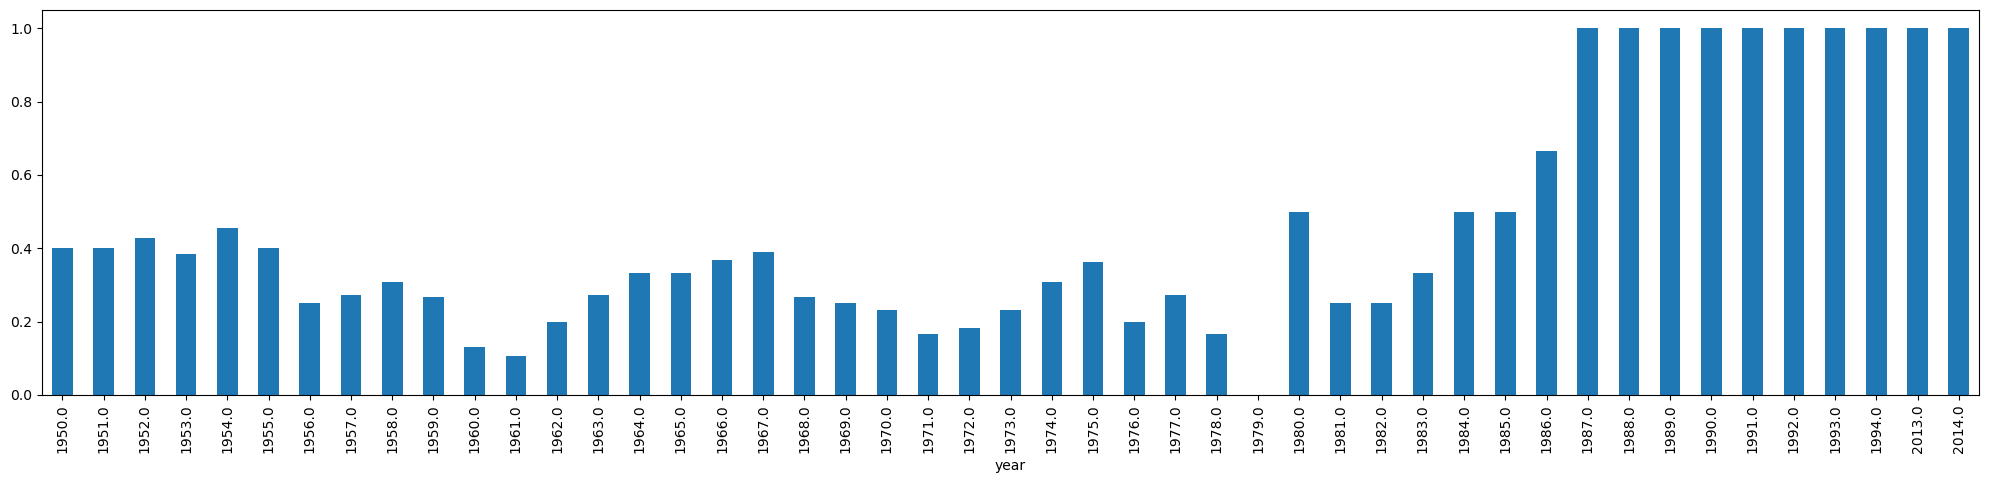

In [27]:
pd.Series(results[(results['manner_of_death'].isin(sad))].groupby('year')['name'].nunique() / results[~(results['manner_of_death'].isnull())].groupby('year')['name'].nunique()).plot.bar(figsize=(25,5))

<Axes: xlabel='year'>

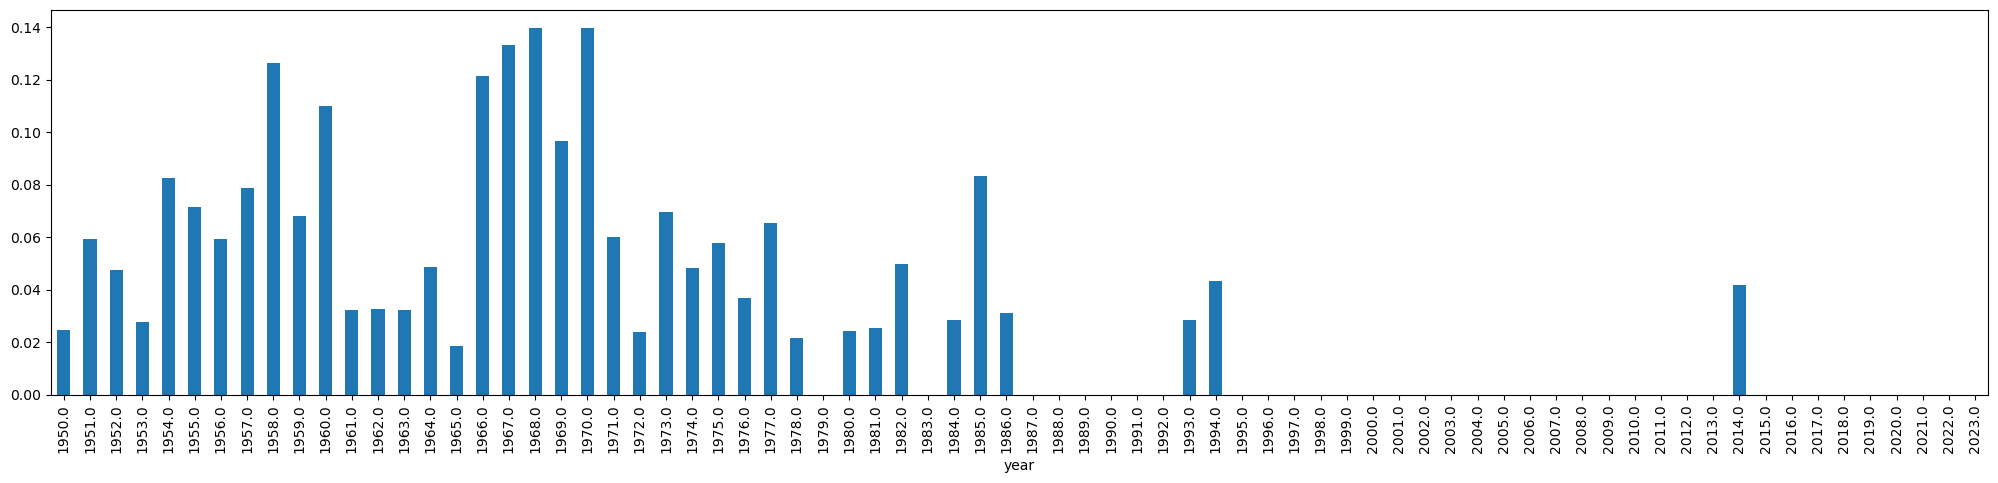

In [28]:
pd.Series(results[(results['life_remaining'] < pd.Timedelta((365.25), unit='d'))].groupby('year')['name'].nunique() / results.groupby('year')['name'].nunique()).plot.bar(figsize=(25,5))